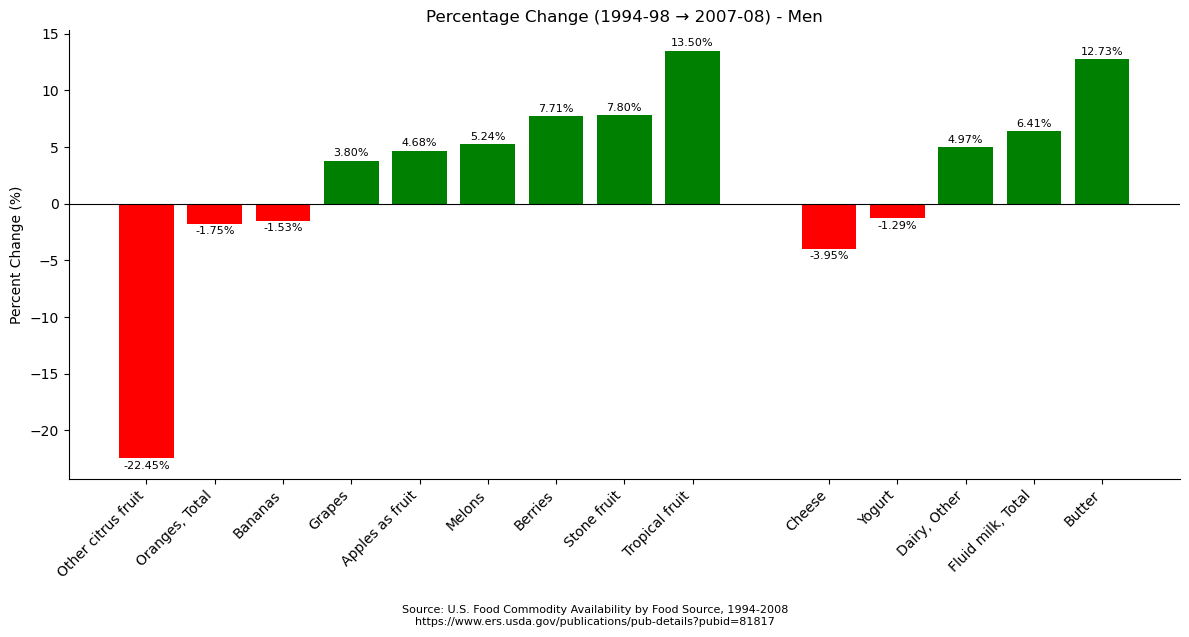

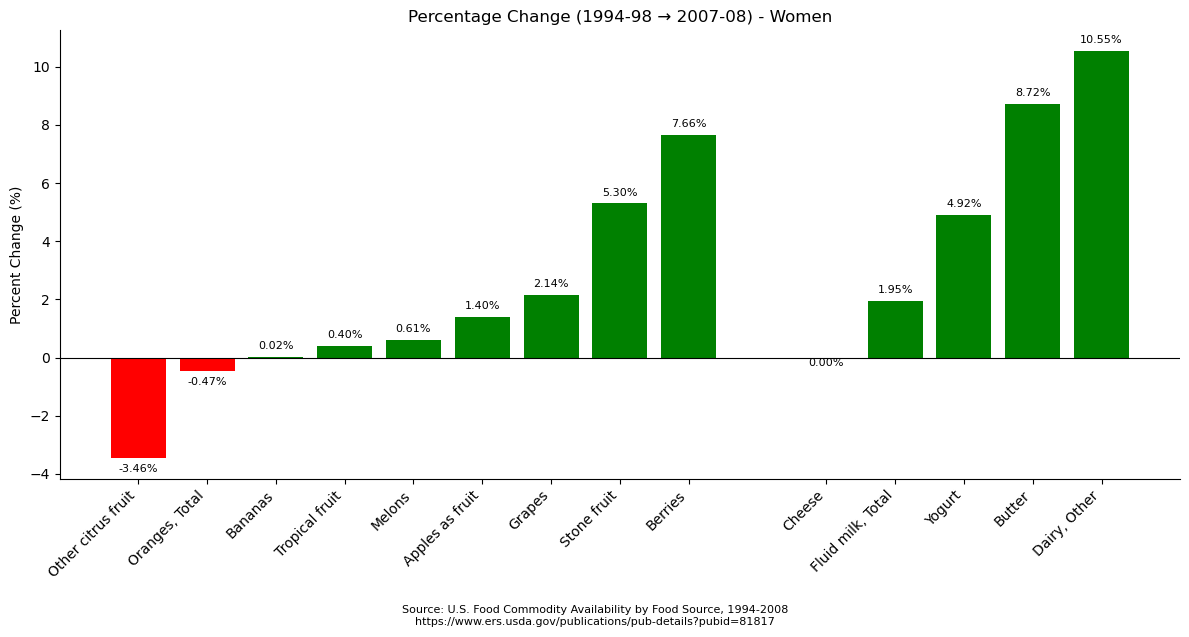

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheets = ["94-98 FAH", "03-04 FAH", "05-06 FAH", "07-08 FAH"]
data = {}
# get data from all sheets needed
for sheet in sheets:
    df = pd.read_excel("../prob1/Appendix B (shares).xls", sheet_name=sheet)
    df = df.iloc[76:139, [0] + list(range(7, 13))].copy()
    df.columns = ["Items", "Men_mean", "Men_lower", "Men_upper", "Women_mean", "Women_lower", "Women_upper"]
    data[sheet] = df

#print (data)

fruit_items = ["Apples as fruit", "Bananas", "Berries", "Grapes", "Melons","Oranges, Total", "Other citrus fruit", "Stone fruit", "Tropical fruit"]
dairy_items = ["Fluid milk, Total", "Butter", "Cheese", "Yogurt", "Dairy, Other"]


for sheet in sheets:
    data[sheet]["Items"] = data[sheet]["Items"].str.strip()

for group in ["Men", "Women"]:
    values = []
    labels = []
    positions = []   # x-axis positions

    offset = 0
    for category_items in [fruit_items, dairy_items]:
        item_changes = []
        for item in category_items:
            start_row = data["94-98 FAH"].loc[data["94-98 FAH"]["Items"] == item, f"{group}_mean"]
            end_row   = data["07-08 FAH"].loc[data["07-08 FAH"]["Items"] == item, f"{group}_mean"]

            if start_row.empty or end_row.empty:
                print(f"Warning: {item} not found for {group}")
                continue

            start_val = start_row.values[0]
            end_val   = end_row.values[0]
            pct_change = (end_val - start_val) / start_val * 100
            item_changes.append((item, pct_change))

        item_changes.sort(key=lambda x: x[1])

        # Add to plot lists with offset
        for j, (item, val) in enumerate(item_changes):
            values.append(val)
            labels.append(item)
            positions.append(offset + j)

        # spacing
        offset += len(item_changes) + 1

    # --- Plot ---
    plt.figure(figsize=(12,6))
    for i, val in enumerate(values):
        color = 'green' if val > 0 else 'red'
        plt.bar(positions[i], val, color=color)
        plt.text(positions[i], val + np.sign(val)*0.2, f"{val:.2f}%",
                 ha='center', va='bottom' if val > 0 else 'top', fontsize=8)

    plt.xticks(positions, labels, rotation=45, ha='right')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f"Percentage Change (1994-98 → 2007-08) - {group}")
    plt.ylabel("Percent Change (%)")

    # clean up spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.figtext(0.5, -0.05,
        "Source: U.S. Food Commodity Availability by Food Source, 1994-2008\nhttps://www.ers.usda.gov/publications/pub-details?pubid=81817",
        ha="center", fontsize=8)

    plt.tight_layout()
    plt.show()


